In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


In [2]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)

In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
from utils.results import SimulationResults

RUNID = "val0"

test0_results = SimulationResults(runid=RUNID)

print(test0_results.var_list)
print(test0_results.timestep_output_ids)

['xgr', 'depth_id', 'timestep_id', 'timestamp', 'cumulative_computational_time', 'zgr', 'angles', 'wave_height', 'wave_energy', 'radiation_stress_xx', 'radiation_stress_xy', 'radiation_stress_yy', 'mean_wave_angle', 'velocity_magnitude', 'orbital_velocity', 'run_up', 'storm_surge', 'thaw_depth', 'abs_xgr', 'abs_zgr', 'ground_temperature_distribution', 'ground_enthalpy_distribution', '2m_temperature', 'sea_surface_temperature', 'solar_radiation_factor', 'solar_radiation_flux', 'long_wave_radiation_flux', 'latent_heat_flux', 'convective_heat_flux', 'total_heat_flux', 'sea_ice_cover', 'wind_velocity', 'wind_direction']
[0.000e+00 1.000e+00 2.000e+00 ... 2.205e+03 2.206e+03 2.207e+03]


In [20]:
xgr0 = test0_results.get_var_timestep("xgr", 0)
zgr0 = test0_results.get_var_timestep("zgr", 0)

abs_xgr0 = test0_results.get_var_timestep("abs_xgr", 0).values.flatten()
abs_zgr0 = test0_results.get_var_timestep("abs_zgr", 0).values.flatten()
ground_temperature_distribution0 = (test0_results.get_var_timestep(
    "ground_temperature_distribution", 0) - 273.15).values.flatten() + 5

In [21]:
vmin, vmax = -5, 5

norm = Normalize(vmin, vmax)

sm = ScalarMappable(norm, cmap='seismic')


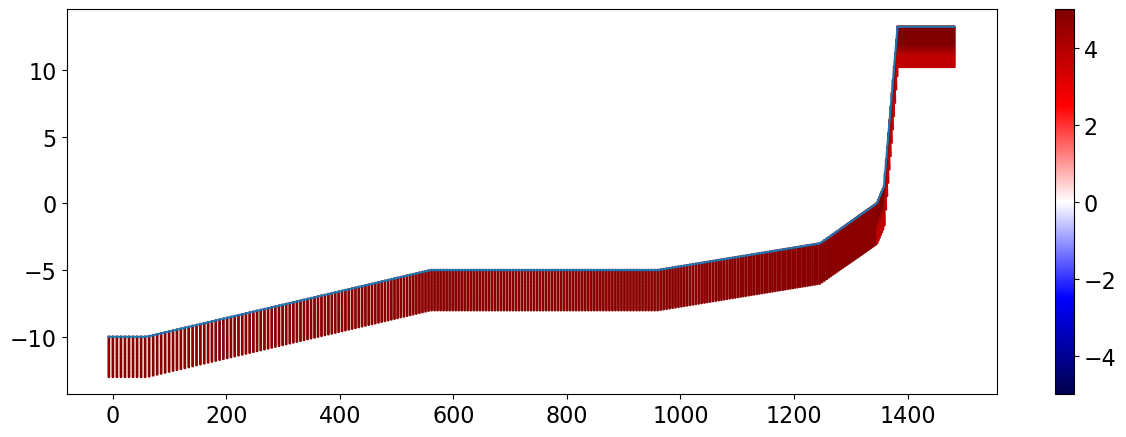

In [37]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0)

scatter = ax.scatter(abs_xgr0, abs_zgr0, s=1, c=ground_temperature_distribution0, cmap='seismic', norm=norm)

# ax.set_xlim(1300, 1400)

# ax.set_aspect('equal')

plt.colorbar(sm, ax=ax, norm=norm)